## Import

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.nn as nn
from utils import *
from torch.autograd import Variable
import os

## Check

In [2]:
check = torch.load('./data/adversarial/fgsm_0.pt')

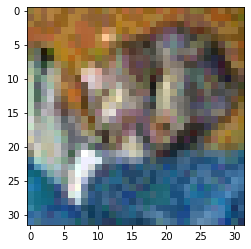

In [12]:
plt.imshow(check[0].detach().cpu().squeeze(0).permute(1, 2, 0))
plt.show()

## Model

In [2]:
model = load_model('./checkpoints/model.th')

In [3]:
assert len(os.listdir('./data/adversarial')) == len(os.listdir('./data/normal'))
normal_data, targets = load_samples('./data/normal')
adv_data, targets_ = load_samples('./data/adversarial')
assert torch.eq(targets, targets_)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
len(list(model.children()))

10

In [12]:
def intermediate_feat(model, dataloader, layer_ct):
    partial_mod = partial_model_execute(model, layer_ct)
    output_feat = torch.tensor([])
    
    for inp, labels in dataloader:
        inputs, labels = Variable(inputs), Variable(labels)
        outputs = partial_mod(inputs)
        output_feat = torch.cat([output_feat, outputs], dim=0)
#         print(output_feat.shape)
    return output_feat

In [ ]:
output_feat = intermediate_feat(model, testloader, layer_ct=1)